In [45]:
#neural network 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
from sklearn.model_selection import train_test_split
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

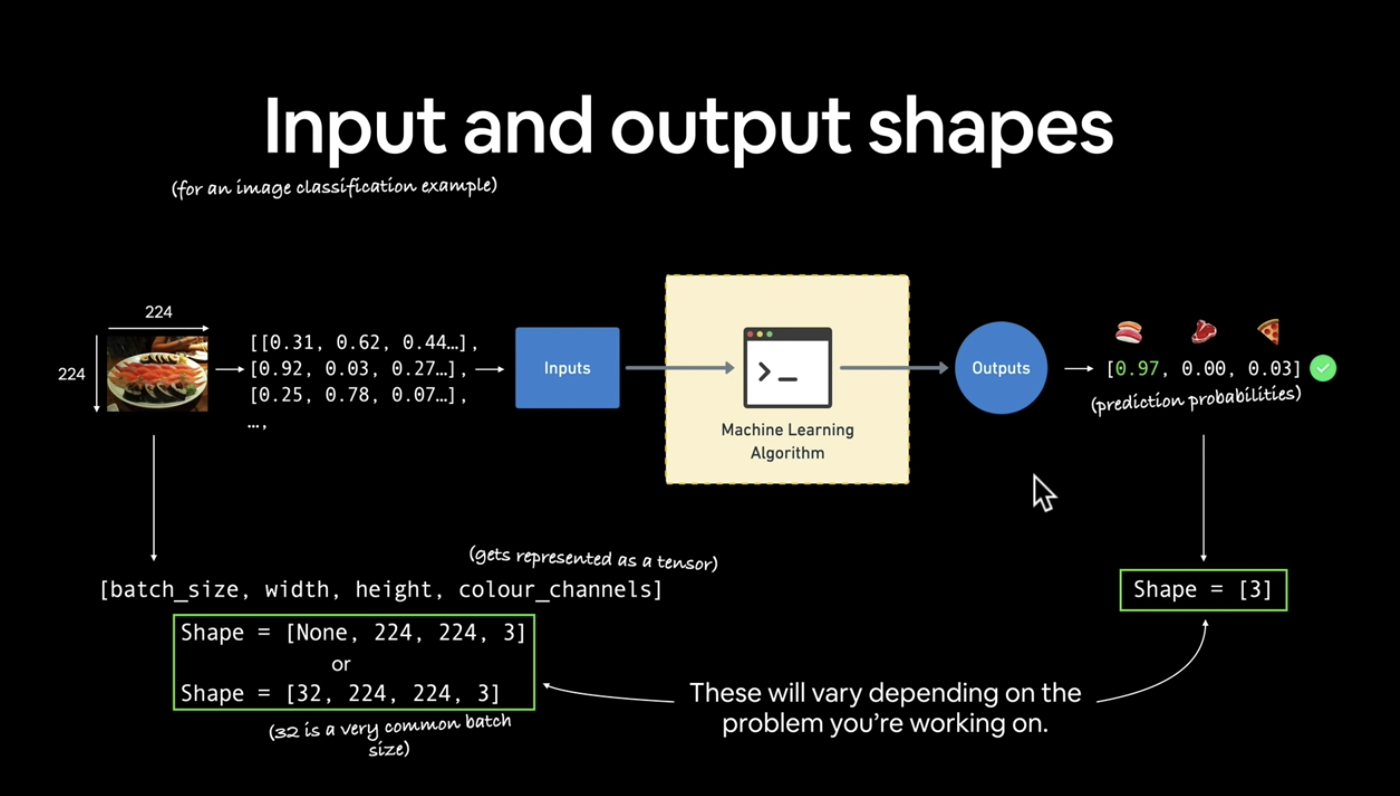

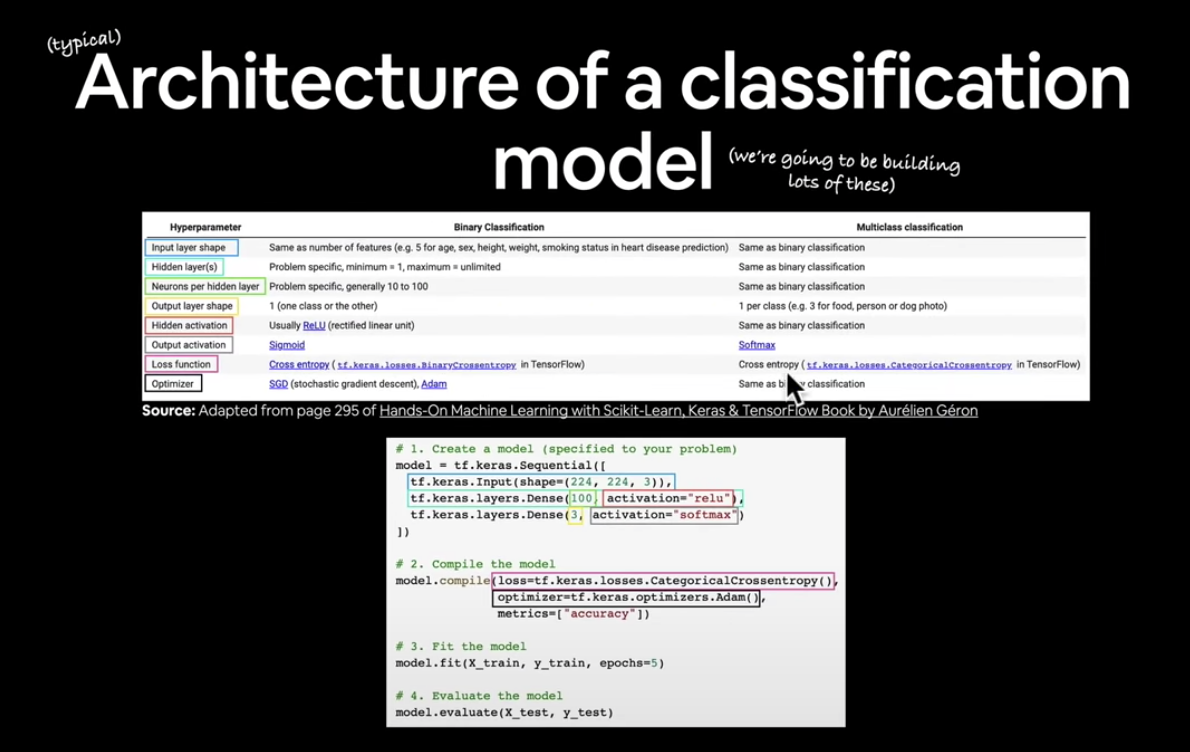

In [2]:
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y;

In [5]:
circles=pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


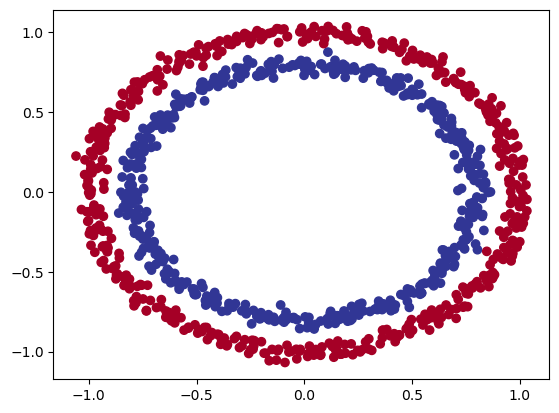

In [6]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [15]:

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [8]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([tf.keras.layers.Dense(1)])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 896us/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5140


In [9]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([tf.keras.layers.Dense(10,activation='relu'),
#                              tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(1)])

model_2.compile(optimizer=tf.optimizers.Adam(),metrics=['accuracy'],loss=tf.losses.BinaryCrossentropy())

model_2.fit(X,y,epochs=100,verbose=2)


Epoch 1/100
32/32 - 1s - loss: 0.9185 - accuracy: 0.4190
Epoch 2/100
32/32 - 0s - loss: 0.8502 - accuracy: 0.3710
Epoch 3/100
32/32 - 0s - loss: 0.8253 - accuracy: 0.3380
Epoch 4/100
32/32 - 0s - loss: 0.8132 - accuracy: 0.2550
Epoch 5/100
32/32 - 0s - loss: 0.8054 - accuracy: 0.2120
Epoch 6/100
32/32 - 0s - loss: 0.7994 - accuracy: 0.2030
Epoch 7/100
32/32 - 0s - loss: 0.7946 - accuracy: 0.1640
Epoch 8/100
32/32 - 0s - loss: 0.7906 - accuracy: 0.1520
Epoch 9/100
32/32 - 0s - loss: 0.7864 - accuracy: 0.1440
Epoch 10/100
32/32 - 0s - loss: 0.7829 - accuracy: 0.1680
Epoch 11/100
32/32 - 0s - loss: 0.7794 - accuracy: 0.1430
Epoch 12/100
32/32 - 0s - loss: 0.7760 - accuracy: 0.1400
Epoch 13/100
32/32 - 0s - loss: 0.7724 - accuracy: 0.1550
Epoch 14/100
32/32 - 0s - loss: 0.7690 - accuracy: 0.1150
Epoch 15/100
32/32 - 0s - loss: 0.7655 - accuracy: 0.1610
Epoch 16/100
32/32 - 0s - loss: 0.7619 - accuracy: 0.1770
Epoch 17/100
32/32 - 0s - loss: 0.7587 - accuracy: 0.1250
Epoch 18/100
32/32 - 0s

In [10]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 954us/step - loss: 0.3647 - accuracy: 0.9830


[0.3646935820579529, 0.9829999804496765]

In [26]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu'),tf.keras.layers.Dense(10,activation='relu'),tf.keras.layers.Dense(1,activation='sigmoid')])
model_3.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])
model_3.fit(X,y,epochs=50,verbose=0)

In [27]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 1.0000


[0.020764373242855072, 1.0]

doing binary classifcation...


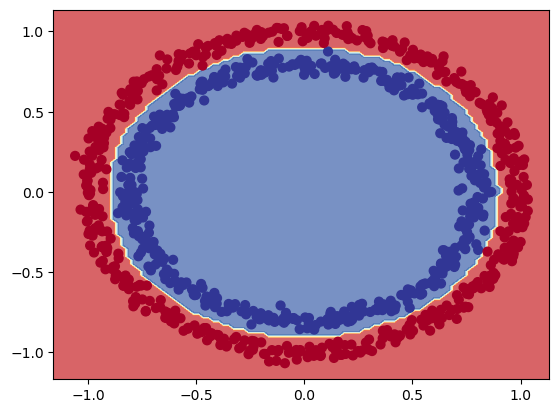

In [28]:
plot_decision_boundary(model_3,X,y)
plt.show()

In [19]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),tf.keras.layers.Dense(4,activation='relu'),tf.keras.layers.Dense(1,activation='sigmoid')])
model_4.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(0.01),metrics=['accuracy'])
history=model_4.fit(X_train,y_train,epochs=25,verbose=0)

In [85]:
model_4.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9450


[0.1886371672153473, 0.9449999928474426]

doing binary classifcation...
doing binary classifcation...


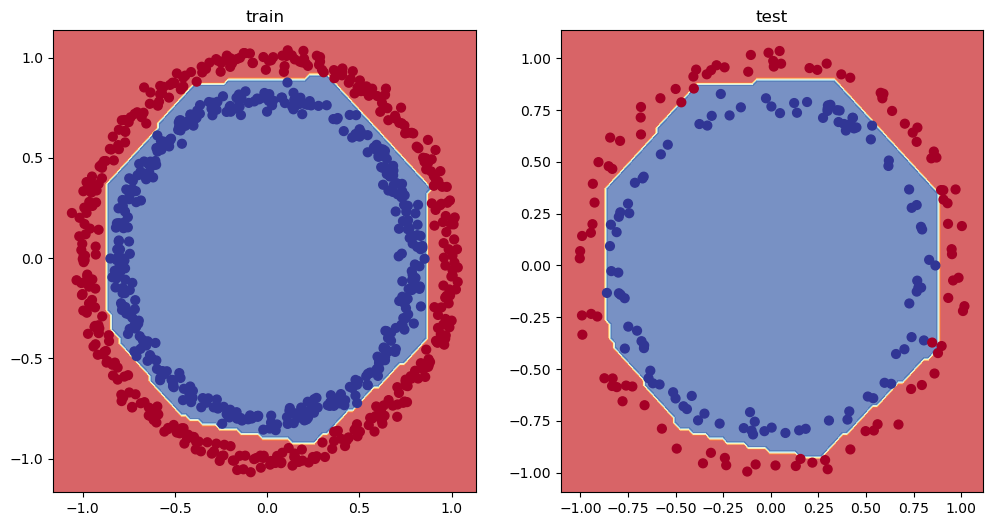

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_4,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_4,X=X_test,y=y_test)
plt.show();


In [57]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684359,0.57375
1,0.674161,0.55000
2,0.665053,0.58250
3,0.658180,0.58125
4,0.648432,0.59625
5,0.613485,0.67125
6,0.556985,0.82500
7,0.496036,0.83500
8,0.403528,0.91750
9,0.343264,0.91750


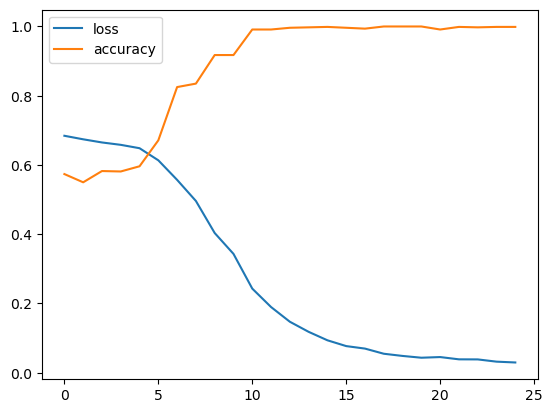

In [61]:
pd.DataFrame(history.history).plot()
plt.show()



Finding the best learning rate.
starting from callbacks.


In [65]:
tf.random.set_seed(42)
model_5=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),tf.keras.layers.Dense(4,activation='relu'),tf.keras.layers.Dense(1,activation='sigmoid')])
model_5.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


#creat a learning rate callback 
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4* 10**(epoch/20))

history_5=model_5.fit(X_train,y_train,epochs=100, callbacks=[lr_scheduler],verbose=2)


Epoch 1/100
25/25 - 1s - loss: 0.6917 - accuracy: 0.5000
Epoch 2/100
25/25 - 0s - loss: 0.6910 - accuracy: 0.4988
Epoch 3/100
25/25 - 0s - loss: 0.6903 - accuracy: 0.4975
Epoch 4/100
25/25 - 0s - loss: 0.6897 - accuracy: 0.5075
Epoch 5/100
25/25 - 0s - loss: 0.6888 - accuracy: 0.5063
Epoch 6/100
25/25 - 0s - loss: 0.6881 - accuracy: 0.5075
Epoch 7/100
25/25 - 0s - loss: 0.6873 - accuracy: 0.5050
Epoch 8/100
25/25 - 0s - loss: 0.6864 - accuracy: 0.5088
Epoch 9/100
25/25 - 0s - loss: 0.6856 - accuracy: 0.5038
Epoch 10/100
25/25 - 0s - loss: 0.6849 - accuracy: 0.5100
Epoch 11/100
25/25 - 0s - loss: 0.6840 - accuracy: 0.5238
Epoch 12/100
25/25 - 0s - loss: 0.6833 - accuracy: 0.5275
Epoch 13/100
25/25 - 0s - loss: 0.6827 - accuracy: 0.5200
Epoch 14/100
25/25 - 0s - loss: 0.6820 - accuracy: 0.5288
Epoch 15/100
25/25 - 0s - loss: 0.6815 - accuracy: 0.5263
Epoch 16/100
25/25 - 0s - loss: 0.6809 - accuracy: 0.5337
Epoch 17/100
25/25 - 0s - loss: 0.6804 - accuracy: 0.5263
Epoch 18/100
25/25 - 0s

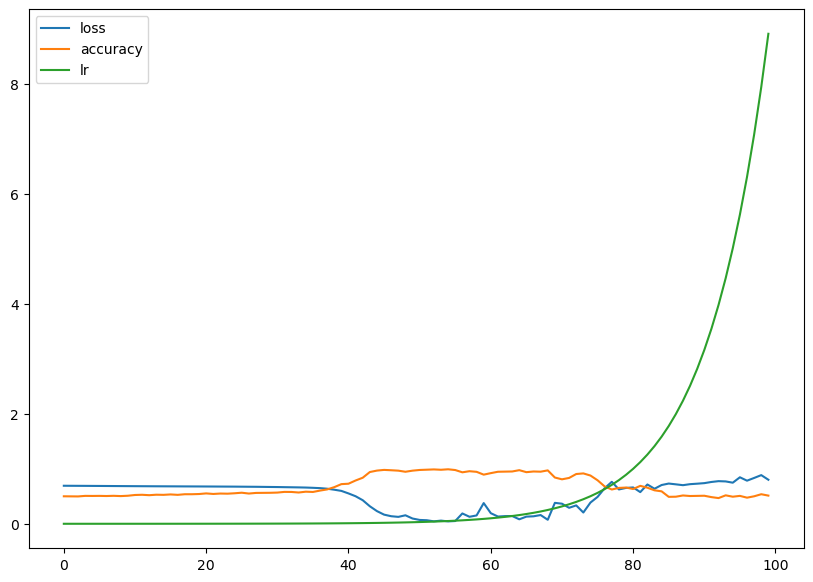

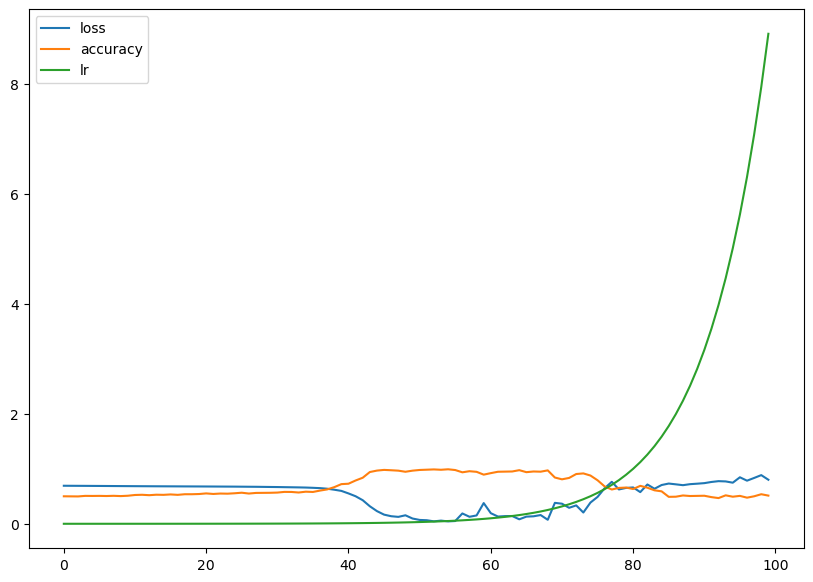

In [68]:
pd.DataFrame(history_5.history).plot(figsize=(10,7))
plt.show()

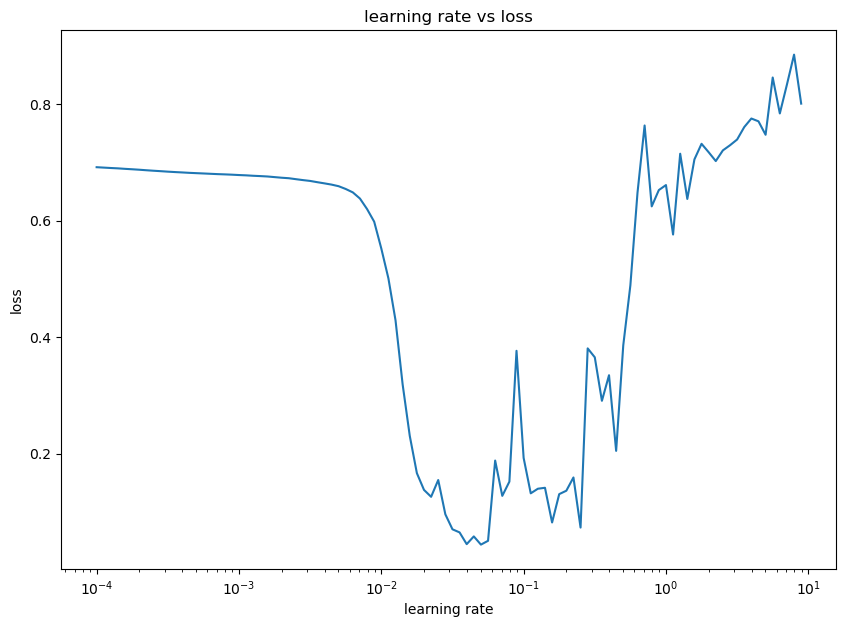

In [72]:
#plotting the learning rate vs loss

lrs=1e-4 *10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_5.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")
plt.show()

In [86]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),tf.keras.layers.Dense(4,activation='relu'),tf.keras.layers.Dense(1,activation='sigmoid')])
model_6.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(lr=0.02),metrics=['accuracy'])
history_6=model_6.fit(X_train,y_train,epochs=20,verbose=2)

Epoch 1/20
25/25 - 0s - loss: 0.6801 - accuracy: 0.5863
Epoch 2/20
25/25 - 0s - loss: 0.6694 - accuracy: 0.5888
Epoch 3/20
25/25 - 0s - loss: 0.6533 - accuracy: 0.6075
Epoch 4/20
25/25 - 0s - loss: 0.6342 - accuracy: 0.6475
Epoch 5/20
25/25 - 0s - loss: 0.5787 - accuracy: 0.7200
Epoch 6/20
25/25 - 0s - loss: 0.5361 - accuracy: 0.7500
Epoch 7/20
25/25 - 0s - loss: 0.4275 - accuracy: 0.8662
Epoch 8/20
25/25 - 0s - loss: 0.3479 - accuracy: 0.9137
Epoch 9/20
25/25 - 0s - loss: 0.2778 - accuracy: 0.9350
Epoch 10/20
25/25 - 0s - loss: 0.2362 - accuracy: 0.9538
Epoch 11/20
25/25 - 0s - loss: 0.1945 - accuracy: 0.9663
Epoch 12/20
25/25 - 0s - loss: 0.1770 - accuracy: 0.9625
Epoch 13/20
25/25 - 0s - loss: 0.1562 - accuracy: 0.9688
Epoch 14/20
25/25 - 0s - loss: 0.1494 - accuracy: 0.9663
Epoch 15/20
25/25 - 0s - loss: 0.1294 - accuracy: 0.9750
Epoch 16/20
25/25 - 0s - loss: 0.1052 - accuracy: 0.9800
Epoch 17/20
25/25 - 0s - loss: 0.1003 - accuracy: 0.9812
Epoch 18/20
25/25 - 0s - loss: 0.0917 - 

In [87]:
model_6.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9100


[0.21504610776901245, 0.9100000262260437]

doing binary classifcation...
doing binary classifcation...


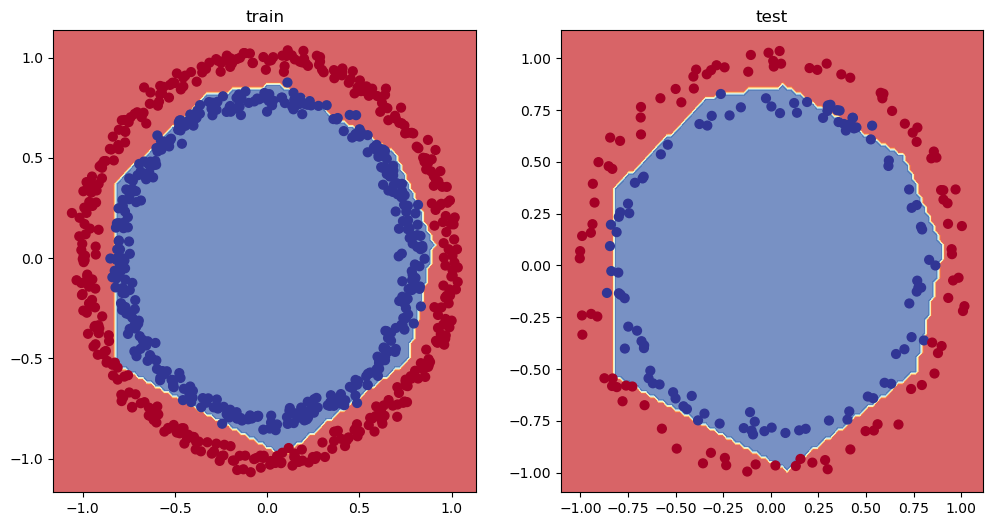

In [88]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_6,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_6,X=X_test,y=y_test)
plt.show();

1. One thing to keep in mind is that accuracy is not good for imbalanced classes.

2. Percision, less false positives
3. recall, less false negatives
4. recall/precision rade off, if one goes up the other one goes down
5. F1-score , 
6. confusion matrix 


In [89]:
from sklearn.metrics import confusion_matrix

y_preds=model_6.predict(X_test)

confusion_matrix(y_test,y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [92]:
y_preds=tf.round(y_preds)

In [93]:

confusion_matrix(y_test,y_preds)

array([[99,  1],
       [17, 83]])

In [94]:
import itertools
figsize=(10,10)
cm=confusion_matrix(y_test,y_preds)

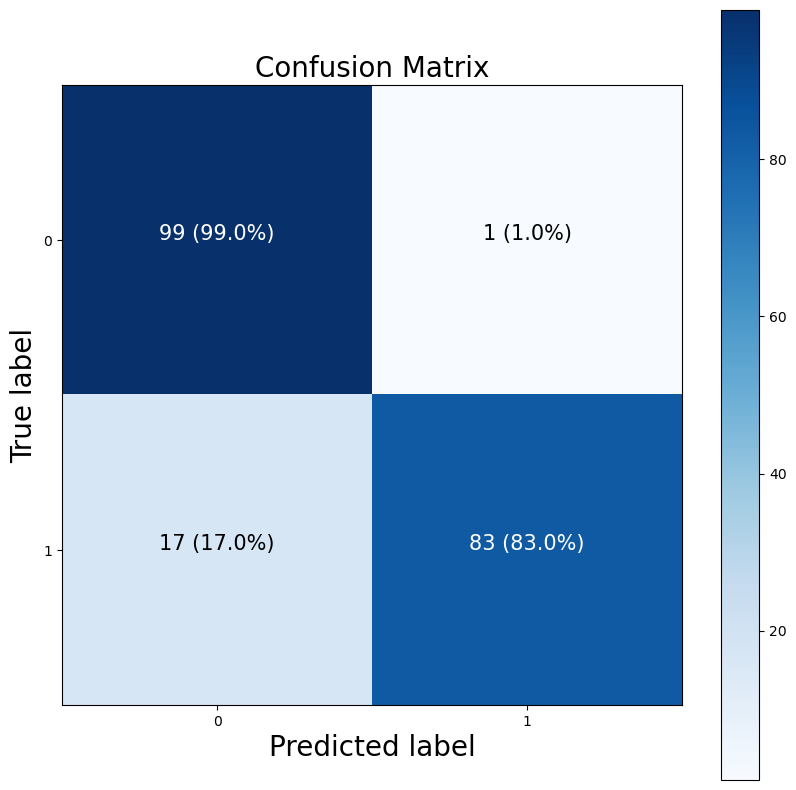

In [98]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)
plt.show();